# Bigram Character Model
## Attribution
Note that this bigram notebook is based *very heavily* on 
Andrej Karpathy's "makemore" aka NN-Zero-to-Hero code and videos. All
credit goes to him.

You can find his repo for the birgram notebook here:
https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part1_bigrams.ipynb
as well as the makemore repo here:
https://github.com/karpathy/makemore
in particular we use his names file found here:
https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

His video is extremely excellent and can be found here:
https://www.youtube.com/watch?v=PaCmpygFfXo

Refer to his LICENSE file in this folder.

## Starting with a purely statistical model
- Set some display properties
- Load in the names and look at some properties of them

In [37]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

import torch
torch.set_printoptions(linewidth=230)

In [38]:
words = open('names.txt', 'r').read().splitlines()

In [39]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [40]:
len(words)

32033

In [41]:
min(len(w) for w in words)

2

In [42]:
max(len(w) for w in words)

15

## Create bigrams
Now let's find all bigrams for each name.
- Find all pairs of characters (bigrams) for each name
- We add in the special character '.' which we use to indicate the start and stop of a word
- Look at some examples and stats

In [43]:
b = {}
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [44]:
list(b.items())

[(('.', 'e'), 1531),
 (('e', 'm'), 769),
 (('m', 'm'), 168),
 (('m', 'a'), 2590),
 (('a', '.'), 6640),
 (('.', 'o'), 394),
 (('o', 'l'), 619),
 (('l', 'i'), 2480),
 (('i', 'v'), 269),
 (('v', 'i'), 911),
 (('i', 'a'), 2445),
 (('.', 'a'), 4410),
 (('a', 'v'), 834),
 (('v', 'a'), 642),
 (('.', 'i'), 591),
 (('i', 's'), 1316),
 (('s', 'a'), 1201),
 (('a', 'b'), 541),
 (('b', 'e'), 655),
 (('e', 'l'), 3248),
 (('l', 'l'), 1345),
 (('l', 'a'), 2623),
 (('.', 's'), 2055),
 (('s', 'o'), 531),
 (('o', 'p'), 95),
 (('p', 'h'), 204),
 (('h', 'i'), 729),
 (('.', 'c'), 1542),
 (('c', 'h'), 664),
 (('h', 'a'), 2244),
 (('a', 'r'), 3264),
 (('r', 'l'), 413),
 (('l', 'o'), 692),
 (('o', 't'), 118),
 (('t', 't'), 374),
 (('t', 'e'), 716),
 (('e', '.'), 3983),
 (('.', 'm'), 2538),
 (('m', 'i'), 1256),
 (('a', 'm'), 1634),
 (('m', 'e'), 818),
 (('.', 'h'), 874),
 (('r', 'p'), 14),
 (('p', 'e'), 197),
 (('e', 'r'), 1958),
 (('r', '.'), 1377),
 (('e', 'v'), 463),
 (('v', 'e'), 568),
 (('l', 'y'), 1588),


In [45]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

## Introducing: Tensors
Tensors are multidimensional arrays. PyTorch implements tensors and we can use them for the purpose of speed, efficiency, and convenience.
- How can we create and work with them?

In [23]:
play = torch.zeros((3, 8), dtype=torch.int32)

In [24]:
play

tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [25]:
play[1,6] = 99
play

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0, 99,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0]], dtype=torch.int32)

In [14]:
N = torch.zeros((27, 27), dtype=torch.int32)

Tensors store numbers, not letters. We need to create a mapping between the letters of the alphabet and indices (numbers).

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [16]:
stoi['r']

18

In [18]:
itos[19]

's'

## Statistics
If we had the exact probability of a bigram occuring, we could use this to create the best model possible. Actually we do have that! Just count each occurence and divide by the total number. Let's start with counts:

In [47]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1  

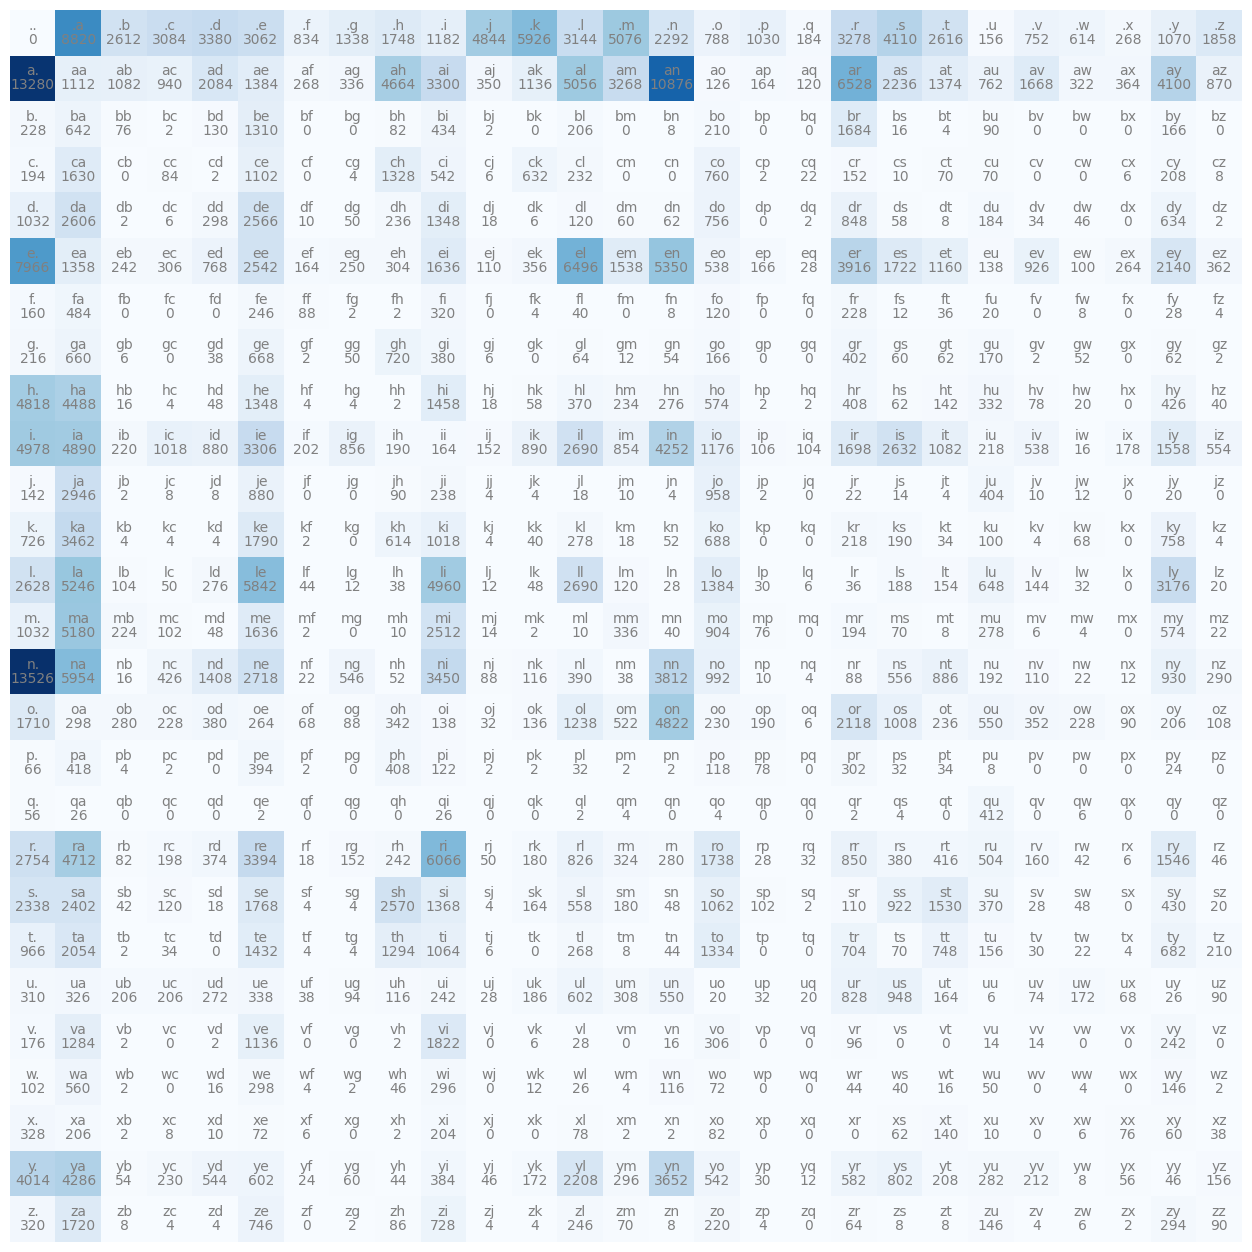

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

We want to be able to sample a probability distribution, not counts! Let's look at the first row of our counts table and create probabilities from it. Then we'll see how we can sample this distribution.

In [50]:
N[0]

tensor([   0, 8820, 2612, 3084, 3380, 3062,  834, 1338, 1748, 1182, 4844, 5926, 3144, 5076, 2292,  788, 1030,  184, 3278, 4110, 2616,  156,  752,  614,  268, 1070, 1858], dtype=torch.int32)

In [61]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273, 0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029, 0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [53]:
# This should be 1 i.e. all probabilites added should be 100%
p.sum()

tensor(1.)

In [63]:
# Let's make a new synthetic distribution with fewer outcomes and see how we can use it
g = torch.Generator().manual_seed(2147483647)
p2 = torch.rand(3, generator=g)
p2 = p / p.sum()
p2

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273, 0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029, 0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [64]:
torch.multinomial(p2, num_samples=100, replacement=True, generator=g)

tensor([18, 14, 20,  5,  3, 20, 15, 20, 11, 10, 10, 14, 19, 12,  5, 13, 14,  1, 11, 18, 11, 22, 10, 10, 14,  1, 11, 13,  1,  4,  4, 13, 19, 18, 10, 18, 19,  8,  1, 13, 19, 13,  2, 19, 19,  4, 18, 18, 10, 21,  5,  1,  2,  8, 11,
        10,  2,  8, 12,  1, 19, 19, 11,  4, 11,  5,  1,  9,  2, 11, 19,  2, 12, 19, 10,  1, 11, 12,  1,  1,  1, 18, 26,  3, 12,  1,  2,  1, 11, 20, 10,  2, 20,  9, 18, 12, 10, 14, 12, 18])

## Sampling the next letter 
Let's apply our computed probability to sample the first letter of a name. How would we sample the next letter?

In [84]:
# We are working with just the first row of our table: the start of a name
p = N[0].float()
p = p / p.sum()

# Now use this probability
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'm'

## Putting it all together
Believe it or not we are almost done. We just need to calculate probabilities for all rows, not just the first. Then we sample over and over until we hit an end character.

In [66]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [67]:
P.shape

torch.Size([27, 27])

In [68]:
P

tensor([[1.5602e-05, 1.3763e-01, 4.0769e-02, 4.8133e-02, 5.2751e-02, 4.7790e-02, 1.3028e-02, 2.0892e-02, 2.7288e-02, 1.8458e-02, 7.5593e-02, 9.2475e-02, 4.9069e-02, 7.9213e-02, 3.5776e-02, 1.2310e-02, 1.6086e-02, 2.8864e-03,
         5.1160e-02, 6.4141e-02, 4.0831e-02, 2.4496e-03, 1.1749e-02, 9.5954e-03, 4.1970e-03, 1.6710e-02, 2.9005e-02],
        [1.9589e-01, 1.6417e-02, 1.5974e-02, 1.3880e-02, 3.0754e-02, 2.0429e-02, 3.9677e-03, 4.9707e-03, 6.8808e-02, 4.8689e-02, 5.1772e-03, 1.6771e-02, 7.4590e-02, 4.8217e-02, 1.6043e-01, 1.8732e-03, 2.4337e-03, 1.7847e-03,
         9.6302e-02, 3.2996e-02, 2.0281e-02, 1.1254e-02, 2.4618e-02, 4.7642e-03, 5.3837e-03, 6.0489e-02, 1.2847e-02],
        [4.3069e-02, 1.2093e-01, 1.4482e-02, 5.6423e-04, 2.4638e-02, 2.4657e-01, 1.8808e-04, 1.8808e-04, 1.5610e-02, 8.1813e-02, 5.6423e-04, 1.8808e-04, 3.8932e-02, 1.8808e-04, 1.6927e-03, 3.9684e-02, 1.8808e-04, 1.8808e-04,
         3.1691e-01, 3.1973e-03, 9.4038e-04, 1.7115e-02, 1.8808e-04, 1.8808e-04, 1.8808e-

In [72]:
P[0].sum()

tensor(1.)

## Activity 1
Generate 5 names using the computed bigram probability distribution.
- Hint: What do all names start with?
- Hint: Given a character, how do you predict the next character?
- Hint: What does every name end with? What should happen after a name ends?

Don't be afraid to copy and paste code that does what you need from our work above.

In [74]:
g = torch.Generator().manual_seed(2147483647)



mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


## Answer
To see the answer, run the cell below

In [ ]:
%load answer1.txt

## Next steps
* How well did we do?
* How can we quantitatively measure the quality of our model?
* Is this the best a bigram model can be?
* How could we improve if we moved away from a bigram model?
* How might our current approach face difficulties if we applied it to other models?

## GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
* equivalent to maximizing the log likelihood (because log is monotonic)
* equivalent to minimizing the negative log likelihood
* equivalent to minimizing the average negative log likelihood

log(a*b*c) = log(a) + log(b) + log(c)

In [ ]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

We have derived a "loss" function. How large can this loss be? How small can this loss be?

In [ ]:
torch.log(torch.tensor(1))

In [ ]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [ ]:
xs

In [ ]:
ys

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

In [ ]:
xenc.shape

In [ ]:
plt.imshow(xenc)

In [ ]:
xenc.dtype

In [ ]:
W = torch.randn((27, 1))
xenc @ W

In [ ]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

In [ ]:
# (5, 27) @ (27, 27) -> (5, 27)

In [ ]:
# SUMMARY ------------------------------>>>>

In [ ]:
xs

In [ ]:
ys

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [ ]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [ ]:
probs.shape

In [ ]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

In [ ]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [ ]:
xs

In [ ]:
ys

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [ ]:
print(loss.item())

In [ ]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [ ]:
W.data += -0.1 * W.grad

In [ ]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [ ]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
# gradient descent
for k in range(1): # YOU PROBABLY WANT TO RUN THIS FOR MORE THAN 1 EPOCH
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

In [ ]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))